### Import Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Dataset

In [2]:
df = sns.load_dataset('flights')
df.shape

(144, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [4]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Visualize

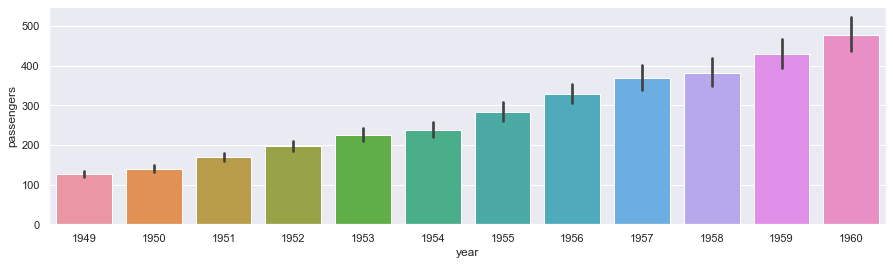

In [5]:
# barplot
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x='year', y='passengers')

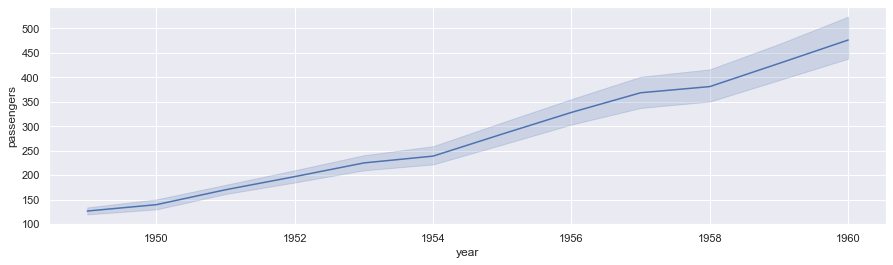

In [6]:
# lineplot
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='year', y='passengers')

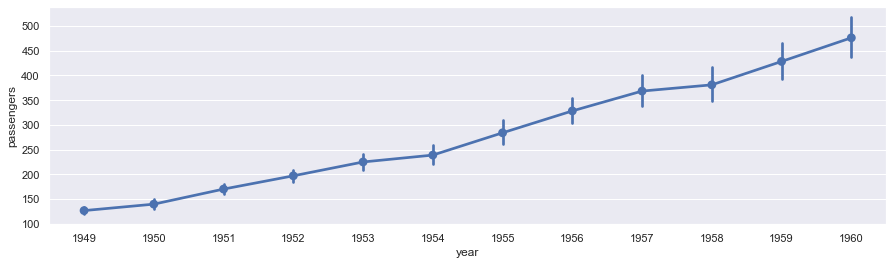

In [7]:
# pointplot

plt.figure(figsize=(15, 4))
sns.pointplot(data=df, x='year', y='passengers')

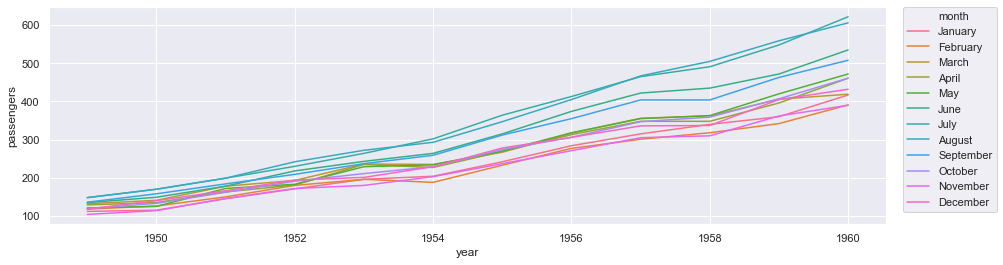

In [8]:
# lineplot에 hue를 설정해서 month에 따라 분리

plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='year', y='passengers', hue='month')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

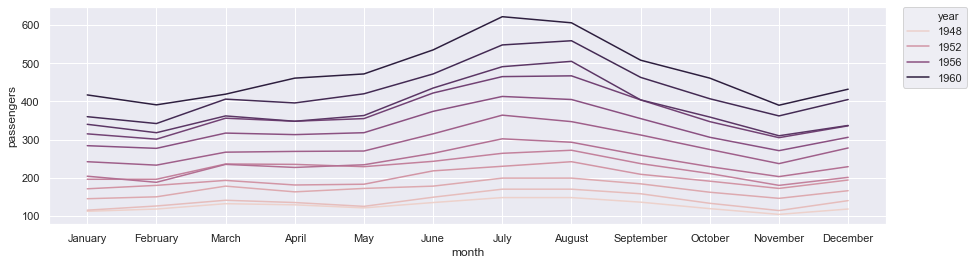

In [9]:
# lineplot에 hue를 통해 year에 따라 분리

plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='month', y='passengers', hue='year')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

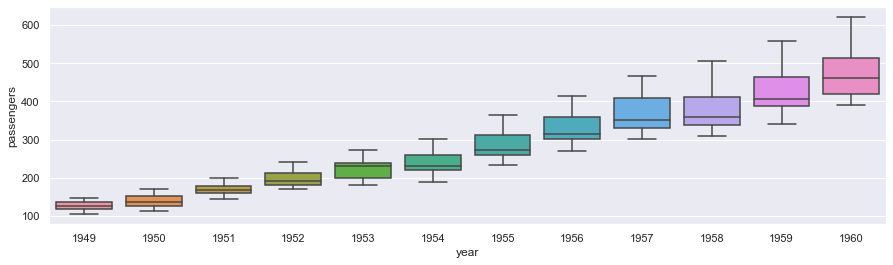

In [10]:
# boxplot

plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x='year', y='passengers')

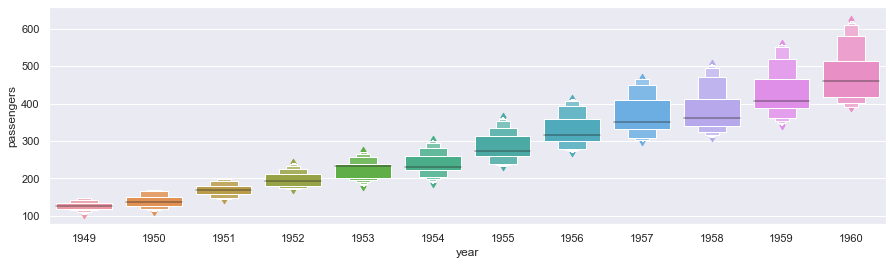

In [11]:
plt.figure(figsize=(15, 4))
sns.boxenplot(data=df, x='year', y='passengers')

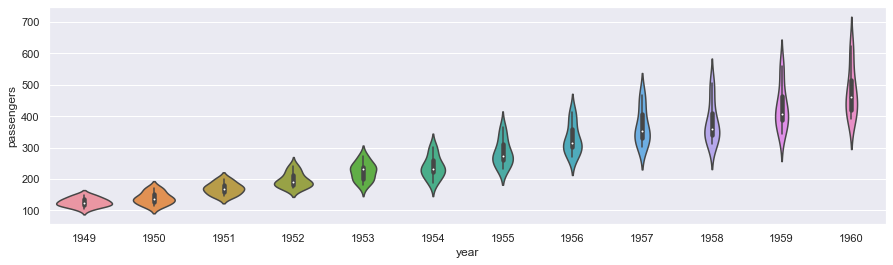

In [12]:
# violinplot

plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x='year', y='passengers')

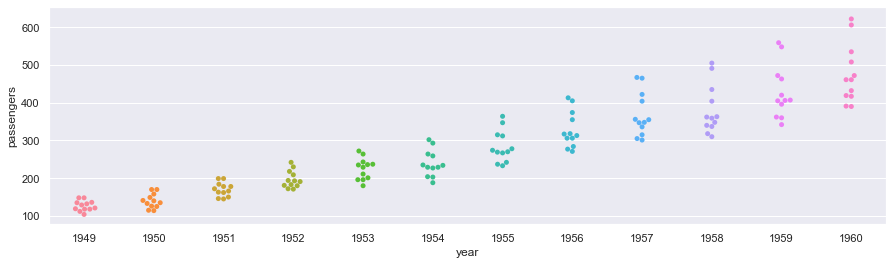

In [13]:
# swarmplot : 범주형 데이터의 산점도

plt.figure(figsize=(15, 4))
sns.swarmplot(data=df, x='year', y='passengers')

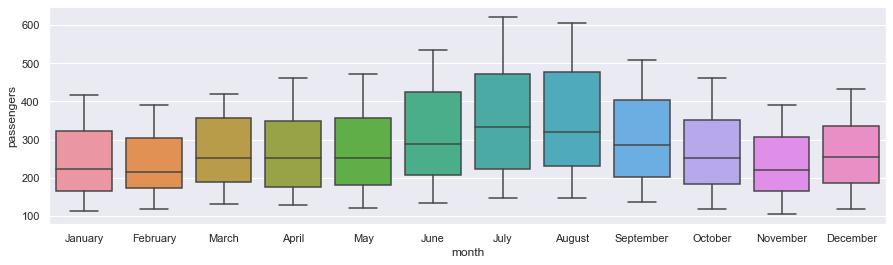

In [14]:
# boxplot : month

plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x='month', y='passengers')

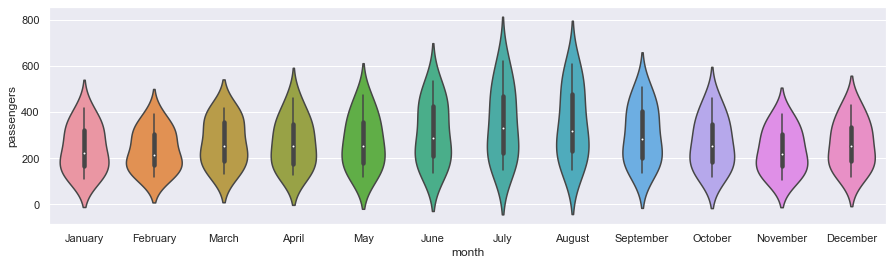

In [15]:
# violinplot : month

plt.figure(figsize=(15,4))
sns.violinplot(data=df, x='month', y='passengers')

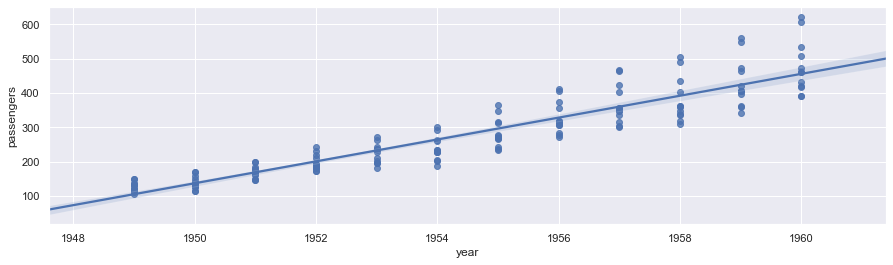

In [16]:
# regplot

plt.figure(figsize=(15, 4))
sns.regplot(data=df, x='year', y='passengers')

### Pivot

In [17]:
df_h = df.pivot(index='month', columns='year', values='passengers')
df_h.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


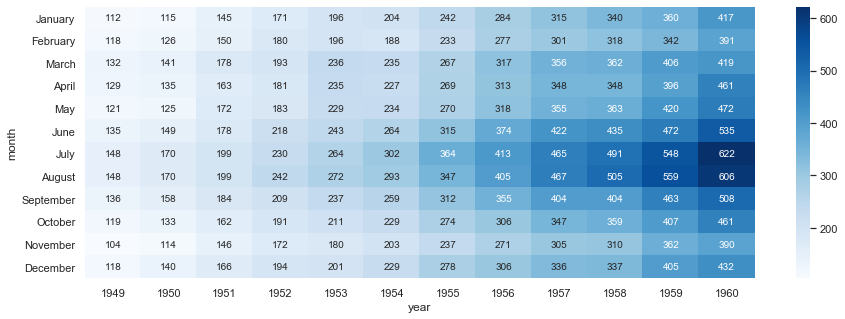

In [18]:
# heatmap

plt.figure(figsize=(15, 5))
sns.heatmap(data=df_h, annot=True, fmt='.0f', cmap='Blues')

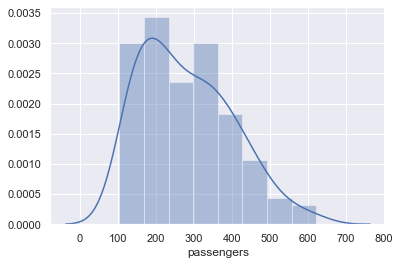

In [19]:
# distplot

sns.distplot(df['passengers'])

### Subplot

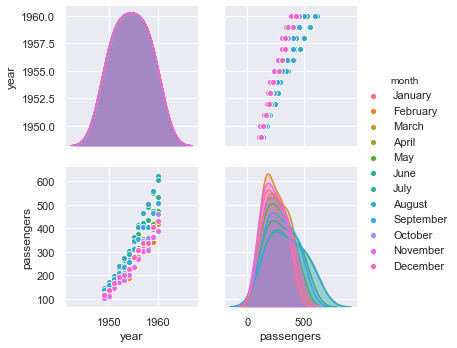

In [20]:
# pairplot

sns.pairplot(data=df, hue='month')

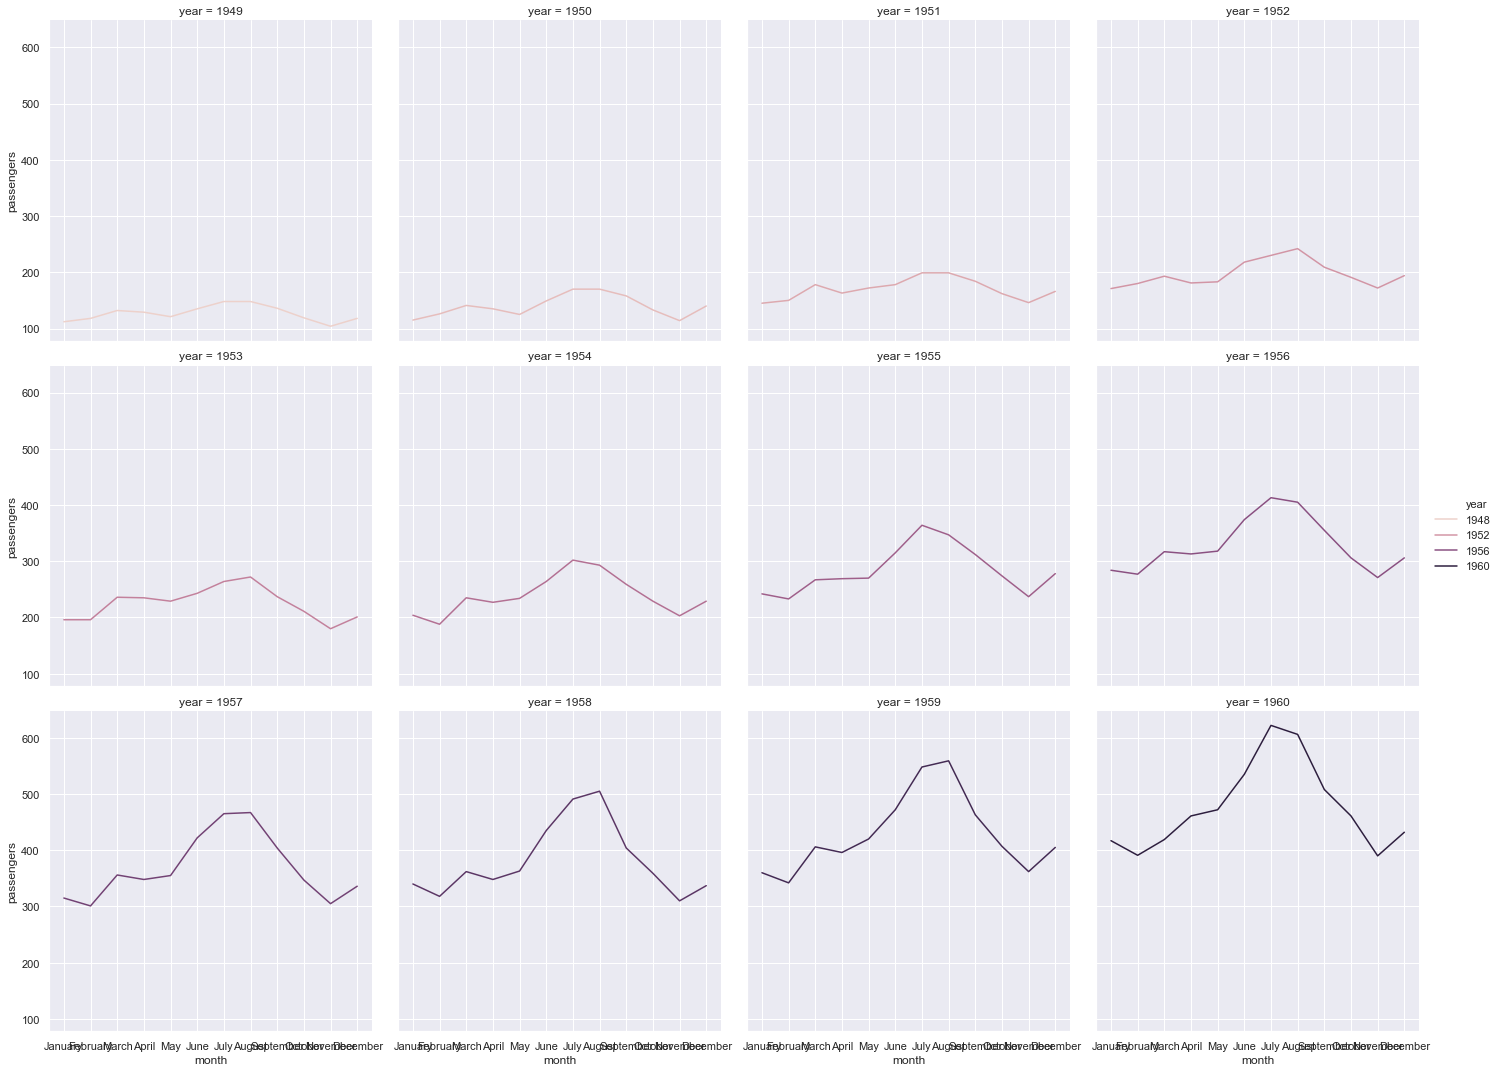

In [22]:
# relplot

sns.relplot(data=df, x='month', y='passengers', kind='line', hue='year', col='year',
           col_wrap=4)

### convert datetime

In [23]:
from datetime import datetime

year=2020
month='March'

s = f"{year} {month} 1"
d = datetime.strptime(s, '%Y %B %d')
d.strftime("%Y-%m-%d")

'2020-03-01'

In [26]:
# find_datetime 함수로 date 변환

def find_datetime(row):
    year = row['year']
    month = row['month']
    
    s = f"{year} {month} 1"
    d = datetime.strptime(s, '%Y %B %d')
    
    return d.strftime("%Y-%m-%d")

In [27]:
row = {'year' : 1949, 'month':'January'}
find_datetime(row)

'1949-01-01'

In [28]:
# pandas apply

import pandas as pd

df['date'] = df.apply(find_datetime, axis=1)
df['date'] = pd.to_datetime(df['date'])
df['date'].head(5)

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: date, dtype: datetime64[ns]

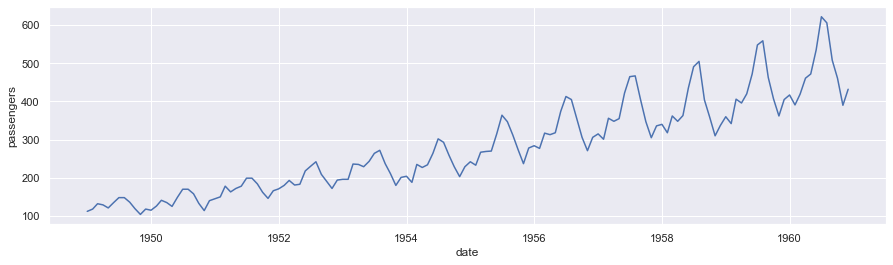

In [29]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='date', y='passengers')

### Time Series data Decomposition

In [30]:
df_date = df[['date', 'passengers']].set_index('date')
df_date.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Additive model

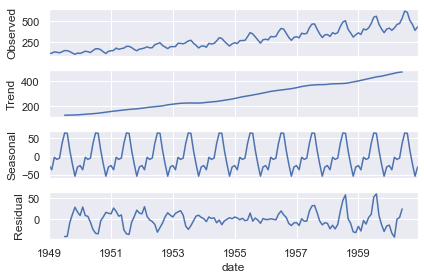

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_date, model='additive')
d = decomp.plot()

#### Multiplicative Model

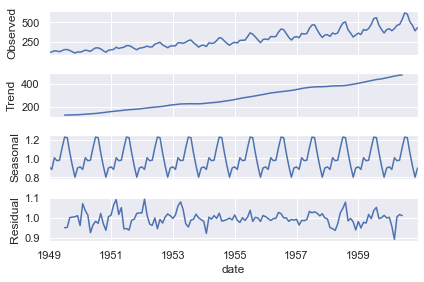

In [32]:
decomp = seasonal_decompose(df_date, model='multiplicative')
d = decomp.plot()